**Load dataset**

In [1]:
import numpy as np
import mlrose
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
X = derm[:,0:33]

# store response vector in "y"
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()



/home/kellgon/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


(358, 35)


# Random Hill Climb

In [2]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'relu', \
                                 algorithm = 'random_hill_climb', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.001,  \
                                 early_stopping = False, clip_max = 5, \
                                 random_state = 6, restarts=100, curve=True)

#nn_model1.fit(X_train_scaled, y_train_hot, init_weights=[0]*600)
nn_model1.fit(X_train_scaled, y_train_hot)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.16433566433566432
0.18055555555555555


# Simulated Annealing

In [3]:
# Initialize neural network object and fit object
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'relu', \
                                 algorithm = 'simulated_annealing', max_iters = 100, \
                                 bias = True, is_classifier = True, clip_max = 5, learning_rate = 0.001, \
                                 early_stopping = False, random_state = 6, curve=True)

#nn_model2.fit(X_train_scaled, y_train_hot, init_weights=[0]*600)
nn_model2.fit(X_train_scaled, y_train_hot)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.16433566433566432
0.18055555555555555


# Genetic Algorithm

In [22]:
# Initialize neural network object and fit object
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'relu', \
                                 algorithm = 'genetic_alg', max_iters = 100, \
                                 bias = True, is_classifier = True, learning_rate = 0.001, \
                                 mutation_prob = 0.1, pop_size = 100, clip_max = 5, \
                                 early_stopping = False, random_state = 6, curve=True)

#nn_model3.fit(X_train_scaled, y_train_hot, init_weights=[0]*600)
nn_model3.fit(X_train_scaled, y_train_hot)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model3.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model3.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)
#0.6118881118881119
#0.6805555555555556


0.6083916083916084
0.7083333333333334


In [5]:
# Initialize neural network object and fit object
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [15], activation = 'relu', \
                                 algorithm = 'gradient_descent', max_iters = 100, \
                                 bias = True, clip_max = 5, is_classifier = True, learning_rate = 0.001, \
                                 early_stopping = False, random_state = 6, curve=True)

#nn_model4.fit(X_train_scaled, y_train_hot, init_weights=[0]*600)
nn_model4.fit(X_train_scaled, y_train_hot)
# Predict labels for train set and assess accuracy
y_train_pred = nn_model4.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model4.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

#print(nn_model4.fitted_weights)
#print(nn_model4.loss)
#print(nn_model4.predicted_probs)
#print(nn_model4.fitness_curve)

0.9790209790209791
0.9444444444444444


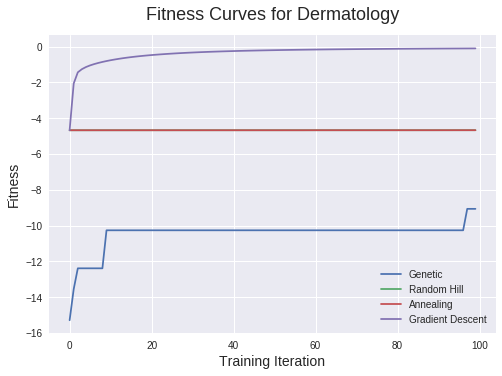

In [6]:
plt.style.use('seaborn')
plt.plot(nn_model3.fitness_curve, label='Genetic')
plt.plot(nn_model1.fitness_curve, label='Random Hill')
plt.plot(nn_model2.fitness_curve, label='Annealing')
plt.plot(nn_model4.fitness_curve, label='Gradient Descent')

#plt.xlim(0,1000)

plt.ylabel('Fitness', fontsize=14)
plt.xlabel('Training Iteration', fontsize = 14)
plt.title('Fitness Curves for Dermatology', fontsize=18, y=1.03)
plt.legend()

In [7]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

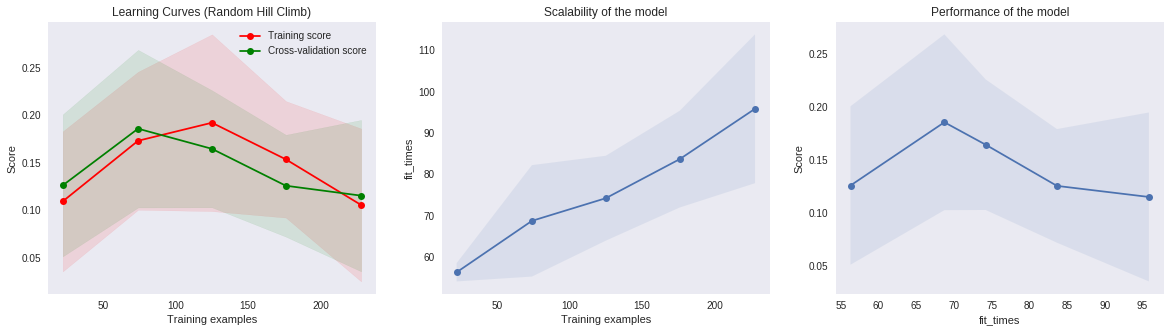

In [23]:
from sklearn.model_selection import learning_curve

title = "Learning Curves (Random Hill Climb)"

plot_learning_curve(nn_model1, title, X_train_scaled, y_train_hot, cv=5)

plt.show()

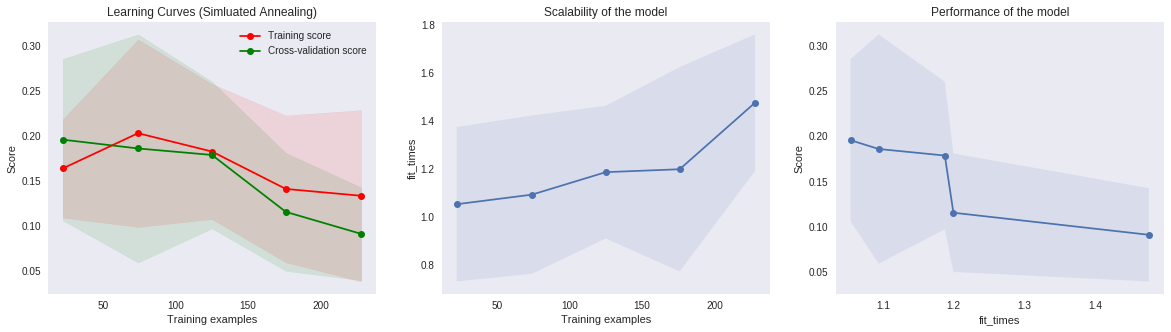

In [24]:
title = "Learning Curves (Simluated Annealing)"

plot_learning_curve(nn_model2, title, X_train_scaled, y_train_hot, cv=5)

plt.show()

In [ ]:
title = "Learning Curves (Genetic Algorithms)"

plot_learning_curve(nn_model3, title, X_train_scaled, y_train_hot, cv=5)

plt.show()

In [ ]:
title = "Learning Curves (Gradient Descent)"

plot_learning_curve(nn_model4, title, X_train_scaled, y_train_hot, cv=5)

plt.show()

In [102]:
print(nn_model1.fitted_weights)


[ 0.7857203  -0.33604039  0.64245825 -0.91660675 -0.78468664  0.19010413
  0.05963472 -0.16238514 -0.3291843   0.24503886 -0.12471715  0.47176421
  0.03607282  0.1577172   0.29071019  0.98044854  0.63871639 -0.17459813
  0.75153531  0.64751887 -0.89205098  0.43727447  0.60434112  0.47281329
  0.4182635   0.08187371 -0.75035165  0.91529459 -0.1934874  -0.56609768
  0.43455169  0.98841488 -0.48877189  0.34261886  0.19801183  0.43466429
  0.87469907 -0.29638046 -0.49273181 -0.19505498  0.49302143  0.44814113
 -0.18778441  0.9787597  -0.10000144 -0.25238313  0.41925721 -0.83508289
 -0.20325416  0.54176193  0.52950197 -0.43328123 -0.61991562 -0.05749807
 -0.33038791  0.46947009 -0.62178577 -0.33779185  0.68845684  0.22904807
  0.77052816  0.95310604  0.67381719 -0.63835075  0.23682102 -0.04778225
 -0.19268669  0.48376738  0.65186658  0.36745966 -0.72145679  0.40565011
 -0.88232542 -0.61466905  0.84958753 -0.18979509 -0.70341693  0.36457426
 -0.6720225   0.29545048 -0.49677171 -0.917249    0

In [63]:
print(nn_model1.loss)
print(nn_model2.loss)
print(nn_model3.loss)
print(nn_model4.loss)


1.9187827972987346
1.9242442156205017
10.281957382454538
0.10117226256292278


In [64]:
print(nn_model4.predicted_probs)


[[9.97989148e-01 1.96488718e-03 2.17695013e-06 1.84323747e-09
  1.76172095e-05 2.61690839e-05]
 [1.93724768e-04 1.35958605e-01 3.80797144e-02 8.08633140e-01
  1.33297798e-02 3.80503604e-03]
 [9.98919814e-01 6.39260992e-04 8.56689179e-07 1.74221422e-07
  1.96247991e-04 2.43646290e-04]
 [2.92674022e-02 8.91276937e-01 7.50728796e-04 7.77257597e-03
  6.55446167e-02 5.38773972e-03]
 [1.68548951e-05 9.09037080e-02 7.06602897e-03 9.01014320e-01
  8.64806783e-04 1.34280985e-04]
 [2.83462225e-05 3.72542322e-04 9.77680030e-01 2.18148557e-02
  1.74927288e-06 1.02476510e-04]
 [3.34005372e-02 7.98383366e-01 1.34609684e-02 7.10050309e-02
  5.84179367e-02 2.53321611e-02]
 [5.72960438e-01 3.99718307e-02 1.74399340e-03 8.40492534e-05
  5.50792250e-02 3.30160464e-01]
 [9.63693347e-06 2.20426756e-02 8.87758989e-03 9.67652012e-01
  1.25309403e-03 1.64991794e-04]
 [6.73334268e-08 1.30290623e-04 9.99573662e-01 2.92825165e-04
  2.04976364e-09 3.15318358e-06]
 [4.00406993e-03 1.26489152e-01 6.93523395e-03 7.5

In [65]:
print(nn_model4.fitness_curve)

[-4.67495133 -2.05949964 -1.43797671 -1.26097145 -1.14168085 -1.05078386
 -0.97709446 -0.91370507 -0.85809782 -0.8077219  -0.76249375 -0.72157804
 -0.68391661 -0.64948725 -0.61778903 -0.58872512 -0.56195745 -0.53735032
 -0.5145529  -0.49316653 -0.47336223 -0.45499703 -0.43784207 -0.42168453
 -0.40631296 -0.39182045 -0.37818954 -0.36540121 -0.35336739 -0.34197125
 -0.33120809 -0.32101184 -0.31133752 -0.30220551 -0.29356936 -0.28539689
 -0.27763725 -0.27027645 -0.26327051 -0.25659688 -0.2502421  -0.24417409
 -0.23838463 -0.23285381 -0.22756466 -0.2224963  -0.21764135 -0.21298759
 -0.20850294 -0.20419077 -0.20004712 -0.19606504 -0.19220018 -0.18848474
 -0.18489973 -0.18142078 -0.17806518 -0.17483613 -0.17172631 -0.16870912
 -0.16579784 -0.16299255 -0.16028787 -0.15768012 -0.15517697 -0.15276197
 -0.15043177 -0.14818011 -0.14600132 -0.14389305 -0.14185488 -0.1398807
 -0.13796787 -0.13611191 -0.13431843 -0.13257815 -0.13088983 -0.12925242
 -0.12766083 -0.12610978 -0.1245946  -0.12312309 -0.